In [1]:
# include dependencies for df manipulation and visualization
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# import Flask
from flask import Flask

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# get columns from the measurement table
inspector = inspect(engine)
inspector.get_columns("measurement")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [5]:
# get columns from the station table
inspector.get_columns("station")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
# Save references for classes and name: 'Station' and 'Measurement'
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
# Link Python to the database by creating an SQLAlchemy session.
session = Session(engine)

# Measurement Analysis

In [8]:
# find the most recent date in measurement
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).all()
measurement_df = pd.DataFrame(results)
measurement_df.rename(columns = ({0: "id", 1: "station", 2: "date", 3: "prcp", 4: "tobs"}), inplace = True)
most_recent_date = measurement_df['date'].iloc[0]
print(f"Most Recent Date: {most_recent_date}")



Most Recent Date: 2017-08-23


In [9]:
recent_date = dt.datetime.strptime(f"{most_recent_date}", "%Y-%m-%d")
recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [10]:
# using the most recent date, find the date from 12 months prior
last_date = recent_date - dt.timedelta(days = 365)
last_date

datetime.datetime(2016, 8, 23, 0, 0)

In [11]:
measurement_df.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


In [12]:
# using the most recent date and calculated date 12 months prior query to gather all 
# observations within that 12 month period
# select only the date and precipitation parameters and sort by date
measurement_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date).filter(Measurement.date <= recent_date).order_by(Measurement.date).all()

# create Pandas DataFrame
measurement_12_df = pd.DataFrame(measurement_12)
measurement_12_df.rename(columns = ({0: "date", 1: "prcp"}), inplace = True)

# set index to date
measurement_12_df.set_index("date", inplace = True)
measurement_12_df.sort_values("date", inplace = True)
measurement_12_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


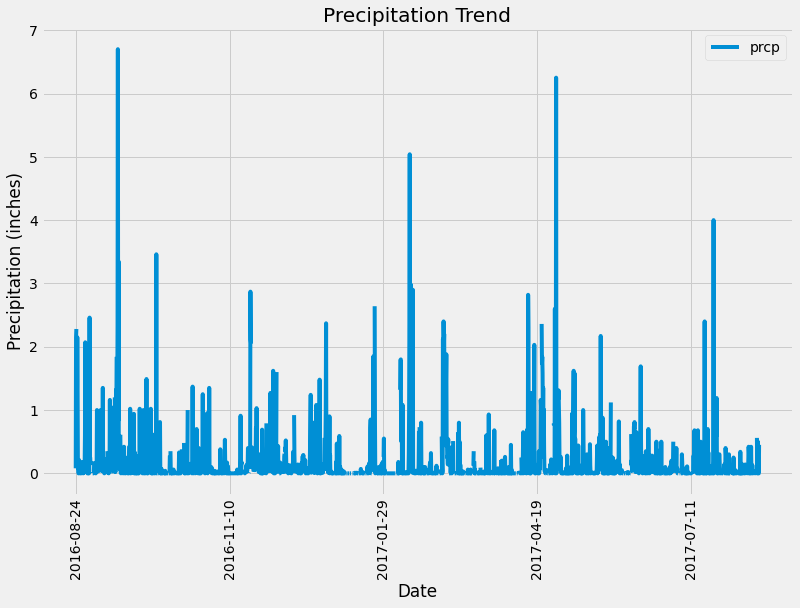

In [13]:
# Plot the results using the DataFrame `plot` method.
measurement_12_df.plot(kind = "line", figsize = (12,8), rot=90)
plt.title("Precipitation Trend")
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
plt.show()

In [14]:
# Use Pandas to print the summary statistics for the precipitation data.
measurement_df.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


# Station Analysis

In [15]:
results = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation)\
.all()
results

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
# Design a query to calculate the total number of stations in the dataset.
station_count = session.query(Station).count()
station_count

9

In [17]:
# List active stations in descending order based on obs counts
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# most active station
most_active_station = session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station

('USC00519281', 2772)

In [19]:
most_active_station_id = most_active_station[0]
most_active_station_id

'USC00519281'

In [20]:
# Using the most active station id, calculate the lowest, highest, and average temperature.
most_active_station_stats = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),\
func.avg(Measurement.tobs), func.count(Measurement.tobs)).\
filter(Measurement.station == most_active_station_id)\
.all()
most_active_station_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

In [21]:
# obtain the last date obs for the most active stations
most_recent_station_table = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(Measurement.station == most_active_station_id).order_by(Measurement.date.desc()).first()
most_recent_date = most_recent_station_table[1]
recent_date = dt.datetime.strptime(f"{most_recent_date}", "%Y-%m-%d")
recent_date

datetime.datetime(2017, 8, 18, 0, 0)

In [22]:
# using the last observed date obtain the date one year earlier
last_date = recent_date - dt.timedelta(days = 365)
last_date

datetime.datetime(2016, 8, 18, 0, 0)

In [23]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
active_table = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station_id).\
filter(Measurement.date >= last_date).filter(Measurement.date <= recent_date).order_by(Measurement.date).all()
active_table_df = pd.DataFrame(active_table)
active_table_df.rename(columns = ({0: "date", 1: "tobs"}), inplace = True)
active_table_df.set_index("date", inplace = True)
active_table_df.sort_values("date", inplace = True)
active_table_df.head()

,tobs
date,
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
2016-08-23,77.0


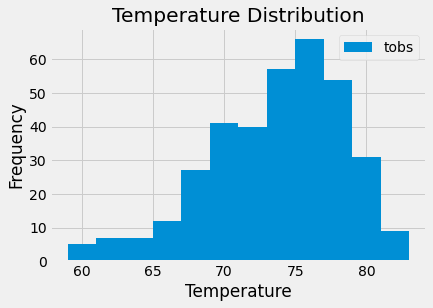

In [24]:
# Plot the results as a histogram with `bins=12`.
plt.hist(active_table_df["tobs"], bins = 12, label = "tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.legend()
plt.show()

In [25]:
# session close
session.close()

### Climate App

In [26]:
# Create home page with all routes
# precipitation
# stations
# tobs

# create app
app = Flask(__name__)

# map route when
@app.route("/")
def home():
    return(
    f"Available routes: <br>"
    f"/api/v1.0/precipitation<br>"
    f"/api/v1.0/stations<br>"
    f"/api/v1.0/tobs<br>"
    f"<br>")

In [27]:
# Convert the query results to a dictionary using `date` as the key and `prcp` as the value.
# Return the JSON representation of your dictionary.

results = session.query(Measurement.date, Measurement.prcp).all()
precipitation_list = []
    
for date, prcp in results:
    precipitation_dict = {}
    precipitation_dict["date"] = date
    precipitation_dict["prcp"] = prcp
    precipitation_list.append(precipitation_dict)
precipitation_list

[{'date': '2010-01-01', 'prcp': 0.08},
 {'date': '2010-01-02', 'prcp': 0.0},
 {'date': '2010-01-03', 'prcp': 0.0},
 {'date': '2010-01-04', 'prcp': 0.0},
 {'date': '2010-01-06', 'prcp': None},
 {'date': '2010-01-07', 'prcp': 0.06},
 {'date': '2010-01-08', 'prcp': 0.0},
 {'date': '2010-01-09', 'prcp': 0.0},
 {'date': '2010-01-10', 'prcp': 0.0},
 {'date': '2010-01-11', 'prcp': 0.01},
 {'date': '2010-01-12', 'prcp': 0.0},
 {'date': '2010-01-14', 'prcp': 0.0},
 {'date': '2010-01-15', 'prcp': 0.0},
 {'date': '2010-01-16', 'prcp': 0.0},
 {'date': '2010-01-17', 'prcp': 0.0},
 {'date': '2010-01-18', 'prcp': 0.0},
 {'date': '2010-01-19', 'prcp': 0.0},
 {'date': '2010-01-20', 'prcp': 0.0},
 {'date': '2010-01-21', 'prcp': 0.0},
 {'date': '2010-01-22', 'prcp': 0.0},
 {'date': '2010-01-23', 'prcp': 0.0},
 {'date': '2010-01-24', 'prcp': 0.01},
 {'date': '2010-01-25', 'prcp': 0.0},
 {'date': '2010-01-26', 'prcp': 0.04},
 {'date': '2010-01-27', 'prcp': 0.12},
 {'date': '2010-01-28', 'prcp': 0.0},
 {'da

In [28]:
# Query the dates and temperature observations of the most active station for the last year of data.
# Return a JSON list of temperature observations (TOBS) for the previous year.

results = session.query(Station.name).all()

station_list = []
for station_nm in results:
    station_list.append(list(station_nm))

station_list

[['WAIKIKI 717.2, HI US'],
 ['KANEOHE 838.1, HI US'],
 ['KUALOA RANCH HEADQUARTERS 886.9, HI US'],
 ['PEARL CITY, HI US'],
 ['UPPER WAHIAWA 874.3, HI US'],
 ['WAIMANALO EXPERIMENTAL FARM, HI US'],
 ['WAIHEE 837.5, HI US'],
 ['HONOLULU OBSERVATORY 702.2, HI US'],
 ['MANOA LYON ARBO 785.2, HI US']]

In [29]:
# Query the dates and temperature observations of the most active station for the last year of data.
# Return a JSON list of temperature observations (TOBS) for the previous year.

station_count = func.count(Measurement.station)
results = session.query(Measurement.station, station_count).group_by(Measurement.station).order_by(station_count.desc()).first()
session.close()
most_active_station_id = results[0]

next_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter_by(station = most_active_station_id).order_by(Measurement.date.desc()).first()    
most_recent_date = next_results[1]

recent_date = dt.datetime.strptime(f"{most_recent_date}", "%Y-%m-%d")

last_date = recent_date - dt.timedelta(days = 365)

most_active_station_table = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_date).\
filter(Measurement.date <= recent_date).filter(Measurement.station == most_active_station_id).order_by(Measurement.date).all()
most_active_station_table
# print(Items, last_date)

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

In [30]:
# session close
session.close()